In [2]:
import pandas as pd
train_df = pd.read_csv('../rootData/train_copy.csv')

In [3]:
train_df.head()

,content,channelName,title
0,聂卫平击败69岁日本老对手：很久没尝过获胜滋味了21日，2020中日韩聂卫平杯围棋大师赛在成...,体育,聂卫平击败69岁日本老对手：很久没尝过获胜滋味了
1,日媒曝东京奥运会开闭幕式预算增至1.597亿美元北京时间12月22日，据知情人士透露，东京奥...,体育,原创 日媒曝东京奥运会开闭幕式预算增至1.597亿美元
2,德约排名第一突破300周大关 超费德勒登顶无悬念搜狐体育消息 北京时间12月22日，塞尔维亚...,体育,原创 德约排名第一突破300周大关 超费德勒登顶无悬念
3,德约排名第一突破300周大关 超费德勒登顶无悬念搜狐体育消息 北京时间12月22日，塞尔维亚...,体育,德约排名第一突破300周大关 超费德勒登顶无悬念
4,ATP年度颁奖：三巨头获奖 费德勒连续18年最受欢迎搜狐体育消息 北京时间12月22日凌晨，...,体育,原创 ATP年度颁奖：三巨头获奖 费德勒连续18年最受欢迎


In [4]:
train_df['content']
for i in range(len(train_df)):
    strs = train_df['content'][i]
    #print(strs)
    if(i<5):
        print(len(str(strs)))   # object of type 'float' has no len() 强制转换 纺织报错
        print()

500

616

903

903

1744



In [5]:
# 显示各新闻的长度分布 这里只是粗略显示 句号分割
train_df['text_len'] = train_df['content'].apply(lambda x: len(str(x).split('。')))
train_df['text_len'].describe()

count    14534.000000
mean        18.474611
std         15.855199
min          1.000000
25%          9.000000
50%         14.000000
75%         23.000000
max        192.000000
Name: text_len, dtype: float64

Text(0.5, 1.0, 'Histogram of char count')

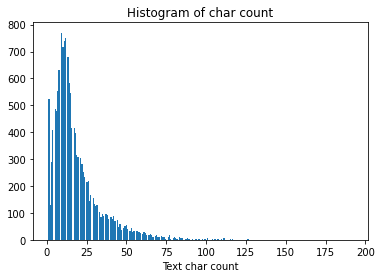

In [6]:
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'], bins=240)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

Text(0.5, 0, 'category')

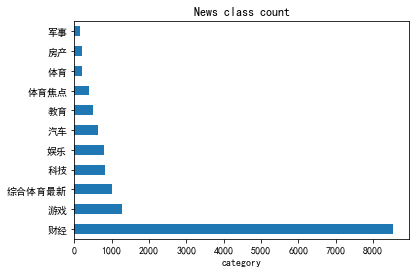

In [7]:
# 生成各类新闻数量的直方图
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

train_df['channelName'].value_counts().plot(kind='barh')
plt.title('News class count')
plt.xlabel("category")
# plt.savefig("label2.png")

In [8]:
# 写入所有content和title 至content.txt

train_df['content']
f = open("../rootData/content.txt","w",encoding='utf-8')
for i in range(len(train_df)):
    strs = train_df['content'][i]
    f.write(str(strs))
    #print(strs)
f.close()

In [9]:
# 统计content的词频
import jieba

file = open("../rootData/content.txt", "r", encoding='utf-8') #此处需打开txt格式且编码为UTF-8的文本
txt = file.read()
words = jieba.lcut(txt)      # 使用jieba进行分词，将文本分成词语列表

count = {}
for word in words:            #  使用 for 循环遍历每个词语并统计个数
    if len(word) < 2:          # 排除单个字的干扰，使得输出结果为词语
        continue
    else:
        count[word] = count.get(word, 0) + 1    
        # 如果字典里键为 word 的值存在，则返回键的值并加一，如果不存在键word，则返回0再加上1
        
exclude = ["可以", "一起", "这样"]  # 建立无关词语列表
for key in list(count.keys()):     # 遍历字典的所有键，即所有word
    if key in exclude:
        del count[key]                  #  删除字典中键为无关词语的键值对
        
list = list(count.items())         # 将字典的所有键值对转化为列表
list.sort(key=lambda x: x[1], reverse=True)     # 对列表按照词频从大到小的顺序排序

for i in range(20):  #   此处统计排名前五的单词，所以range(5)
    word, number = list[i]
    print("关键字：{:-<10}频次：{:+>8}".format(word, number))



Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.248 seconds.
Prefix dict has been built successfully.


关键字：发展--------频次：+++28879
关键字：中国--------频次：+++28345
关键字：企业--------频次：+++22674
关键字：2020------频次：+++16300
关键字：市场--------频次：+++16268
关键字：经济--------频次：+++15948
关键字：增长--------频次：+++14383
关键字：建设--------频次：+++12569
关键字：亿元--------频次：+++12253
关键字：记者--------频次：+++12061
关键字：表示--------频次：+++11517
关键字：服务--------频次：+++11325
关键字：实现--------频次：+++11312
关键字：产业--------频次：+++11226
关键字：疫情--------频次：+++10039
关键字：通过--------频次：++++9863
关键字：我们--------频次：++++9842
关键字：创新--------频次：++++9774
关键字：项目--------频次：++++9601
关键字：平台--------频次：++++9483


[(' ', 72031), ('年', 39399), ('月', 32120), ('发展', 28879), ('中国', 28334), ('企业', 22672), ('中', 21687), ('新', 19552), ('上', 18560), ('日', 17443)]


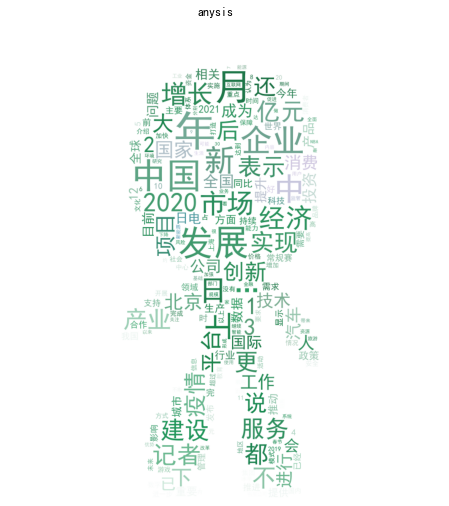

In [10]:
# 导入扩展库 生成词云
import re           # 正则表达式库
import collections  # 词频统计库
import numpy as np  # numpy数据处理库
import jieba        # 结巴分词
import wordcloud    # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库
from pylab import mpl           # 用于处理中文乱码

# 读取文件
fn = open('../rootData/content.txt', encoding='utf-8') # 打开文件并编码
string_data = fn.read() # 读出整个文件
fn.close() # 关闭文件

# 文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|\（|\）"') # 定义正则表达式匹配模式
string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除

# 文本分词
seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
object_list = []

# 加载 哈工大的停用词表 清洗用到
with open("../data/hit_stopwords.txt", 'r', encoding='utf-8') as f:
    remove_words = [w.strip('\n') for w in f.readlines()]

for word in seg_list_exact: # 循环读出每个分词
    if word not in remove_words: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

# 词频统计
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top10 = word_counts.most_common(10) # 获取前10最高频的词
print (word_counts_top10) # 输出检查

# 词频展示 
mask = np.array(Image.open('../rootData/TestImg.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/SimHei.ttf', # 设置字体格式
    mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100, # 字体最大值
    background_color='white'# 设置背景颜色,默认为黑色black
)

fig = plt.figure(figsize=(10, 8)) # 设置显示窗口大小
wc.generate_from_frequencies(word_counts) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.suptitle('anysis') #这里设置中文可能会乱码，需要导包
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像
wc.to_file('../rootData/result01.jpg') # 无白边保存图片
fig.savefig('../rootData/result02.jpg') # 有白边保存

# 查看词云 说明清洗有效


In [11]:
import jieba
import pandas as pd
import re

train_df = pd.read_csv('../rootData/train_copy.csv')
train_df['content']

dic = {'科技': 0,  '体育': 2, '娱乐': 3,  '军事': 4, '其他': 5, '教育': 6, '财经': 7, '汽车': 8, '游戏': 9, '房产': 10 }

# 读取停用词
with open("../data/hit_stopwords.txt", 'r', encoding='utf-8') as f:
    stopword_list = [w.strip('\n') for w in f.readlines()]

Endlist = []

for i in range(len(train_df['content'])):
    lists = []
    title = str(train_df['title'][i])
    strs = str(train_df['content'][i]) + title
    labels = str(train_df['channelName'][i])
    if(labels in dic) :
        labels = dic[labels]
    
    # 去除中文标点符号
    strs = re.sub("[\s+\.\!\-\/_,$%^*()+\"\']+|[+——！，。？、~@#￥%……&*（）：”“]", "",strs)
    # 使用jieba进行分词，将文本分成词语列表
    words = jieba.lcut(strs)
    result = ""
    # 然后清除停用词语
    for word in words:
        if word not in stopword_list:
            result = result + " " + word
    # print(result)
    # print(type(result))
    # print()

    lists.append(labels)
    lists.append(result)
    Endlist.append(lists)
    # 最终是一个二维矩阵 方便 pandas 操作
print(Endlist[:10])


[[2, ' 聂卫平 击败 69 岁 日本 老 对手 很久没 尝过 获胜 滋味 21 日 2020 中日韩 聂卫平 杯 围棋 大师赛 成都 拉开战幕 揭幕战 中 68 岁 聂卫平 战胜 69 岁 老 对手 武宫正树 常昊胜 山下 敬吾 古力 战胜 河野 临吴 依铭胜 上野 梨纱 中国队 40 横扫 日本队 首届 中日韩 聂卫平 杯 围棋 大师赛 2019 年 举办 中国围棋 历史 上 第一个 棋手 名字 命名 比赛 今年 比赛 受 疫情 影响 赛事 移师 线上 举行 本次 大师赛 中国 选手 聂卫平 中国围棋协会 副 主席 世界冠军 常昊 八 冠王 古力 13 岁 小将 吴依铭 日本队 武宫正树 山下 敬吾 河野 上野 梨纱 出战 韩国 方面 曹薰铉 李昌镐 尹畯 相 郑有珍 名将 对阵 武宫正树 前 聂卫平 赛前 笑言 很久没 下网 棋 最 担心 滑标 以前 曾 出现 几次 聂老 担心 实属 多余 赢 棋后 直接 表示 很久没 有尝过 正式 比赛 中 获胜 滋味 美妙 比赛 中 很 想 品尝 一下 赛程 日本队 22 日 对战 韩国队 23 日 中国队 对战 韩国队 同日 揭晓 本次 比赛 冠军 归属 本次 比赛 第四 台 少年 棋手 全都 女子 棋手 出战 显示 出 女棋手 竞技 水平 影响力 正在 显著 提升 澎湃 新闻 返回 搜狐 查看 更 聂卫平 击败 69 岁 日本 老 对手 很久没 尝过 获胜 滋味'], [2, ' 日媒 曝 东京 奥运会 开 闭幕式 预算 增至 1597 亿美元 北京 时间 12 月 22 日据 知情 人士 透露 东京 奥运会 组委会 正 计划 推迟 举行 东京 奥运会 残奥会 开 闭幕式 预算 提高 165 亿日元 约 1597 亿美元 组织者 已 决定 提高 预算 额外 35 亿日元 原因 新冠 病毒 大 流行 推迟 一年 影响 延期 演出 内容 需要 调整 据悉 奥运会 简办 预计 压缩 艺术 部分 尽可能 抑制 成本增加 幅度 组织者 第二次 提高 定于 2021 年 7 月 23 日 日本 首都 举行 东京 奥运会 开 闭幕式 预算 第一次 去年 2 月 敲定 企划 演出 主要 内容 提出 必要 项目 费时 预计 超过 申奥 阶段 文件 中 估计 91 亿日元 预算 增加 约 43 增加 130 亿日元 奥组委 开 闭幕式

In [12]:
import csv

header = ['label', 'text']
with open('../rootData/train_set.csv', 'w', encoding="utf-8", newline='') as f: # 解决空行的问题
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(Endlist)
f.close()